In [1]:
import argparse
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import torch

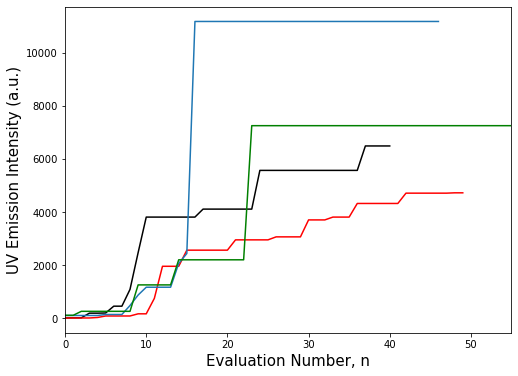

In [3]:
# optimization progress: result of each iteration and best results
# to compare optimizations with the same initial dataset but different beta values
DATA_DEST1 = "../saved_data/simulation_log_YbErTm_VIStoUV_logEmission_beta=5_10inits_0.csv"
DATA_DEST2 = "../saved_data/simulation_log_YbErTm_VIStoUV_logEmission_beta=5_10inits_1.csv"
DATA_DEST3 = "../saved_data/simulation_log_YbErTm_VIStoUV_logEmission_beta=5_10inits_2.csv"
DATA_DEST4 = "../saved_data/simulation_log_YbErTm_VIStoUV_logEmission_beta=5_10inits_3.csv"

df1 = pd.read_csv(DATA_DEST1)
df2 = pd.read_csv(DATA_DEST2)
df3 = pd.read_csv(DATA_DEST3)
df4 = pd.read_csv(DATA_DEST4)

def get_MaxSoFar(df):
    evalued = len(df)
    max_ems = []
    for i in range(evalued):
        max_ems.append(df.iloc[0:i+1].UV.max())
    x = range(len(max_ems)) 
    return x, max_ems

x1, y1 = get_MaxSoFar(df1)
x2, y2 = get_MaxSoFar(df2)
x3, y3 = get_MaxSoFar(df3)
x4, y4 = get_MaxSoFar(df4)


fig, ax = plt.subplots(figsize=(8, 6))

l1=ax.plot(x1[:-9], y1[9:], c='black', alpha = 1, label='initial dataset 1')
l2=ax.plot(x2[:-9], y2[9:], c='r', alpha = 1, label='initial dataset 2')
l3=ax.plot(x3[:-9], y3[9:], alpha = 1, label='initial dataset 2')
l4=ax.plot(x4[:-9], y4[9:], c='green', alpha = 1, label='initial dataset 3')

FontSize = 15


ax.set_xlabel('Evaluation Number, n', fontsize = FontSize)
ax.set_ylabel('UV Emission Intensity (a.u.)', fontsize = FontSize)

#ax2.tick_params(axis='y', color='r')
#ax2.spines['right'].set_color('red') 
#plt.setp(ax2.get_yticklabels(), visible=False)
x = range(max(len(x1)-20,len(x2)-10,len(x3)-10))
# plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='#00A1FF', alpha=0.19)
# plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
plt.xlim([x[0]-x[-1]*0.05,x[-1]+x[-1]*0.05])
plt.xlim([0,55])
plt.show()


In [3]:
import statistics

plt.rcParams["font.family"] = "arial"
def stupid_stderr(x_list, y_list):
    mydict = {}
    for x, y in sorted(zip(x_list, y_list), key=lambda pair: pair[0]):
        if x not in mydict:
            mydict[x] = [y]
        else:
            mydict[x].append(y)
    xs = []
    ys = []
    std = []
    for key, value in mydict.items():
        xs.append(key)
        ys.append(sum(value) / len(value))
        std.append(statistics.pstdev(value)/len(value))
    return np.array(xs), np.array(ys), np.array(std)
def stupid_stddev(x_list, y_list):
    mydict = {}
    for x, y in sorted(zip(x_list, y_list), key=lambda pair: pair[0]):
        if x not in mydict:
            mydict[x] = [y]
        else:
            mydict[x].append(y)
    xs = []
    ys = []
    std = []
    for key, value in mydict.items():
        xs.append(key)
        ys.append(sum(value) / len(value))
        std.append(statistics.pstdev(value))
    return np.array(xs), np.array(ys), np.array(std)

def plot_optimization_stderr(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].UV.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, stderr = stupid_stderr(log_step,log_result)
    return step, mean, stderr


def plot_optimization_stderr_VIS(df_list):
    log_result=[] # the list to save results of each trials
    log_step = []

    for i,df in enumerate(df_list):
        evalued = len(df)
        y_ = []
        x_ = []
        for i in range(evalued):
            y_.append(df.iloc[0:i+1].VIS.max())
            x_.append(i)
        log_result += y_
        log_step += x_
    step, mean, stderr = stupid_stderr(log_step,log_result)
    return step, mean, stderr

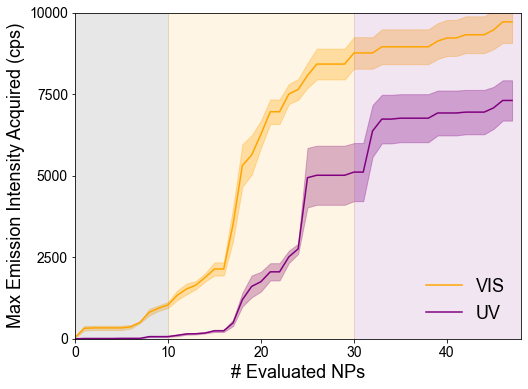

In [124]:
plt.rcParams["font.family"] = "arial"

df_list = [df1[:48],df2[:48],df3[:48],df4[:48]]


c1 = 'purple'
FontSize = 18
ticksize = 14
fig, ax1 = plt.subplots(figsize=(8,6))

x,y,stderr = plot_optimization_stderr_VIS(df_list)
plt.plot(x,y,c='orange',label='VIS')
plt.fill_between(x, y-stderr, y+stderr, color='orange',alpha=0.3)

x2,y2,stderr2 = plot_optimization_stderr(df_list)
plt.plot(x2,y2,c=c1,label='UV')
plt.fill_between(x2, y2-stderr2, y2+stderr2, color=c1,alpha=0.3)

plt.legend(fontsize = FontSize, frameon=False)
plt.axvspan(0, 10, color='grey', alpha=0.19)
plt.axvspan(10, 30, color='orange', alpha=0.1)
plt.axvspan(30, 60, color='purple', alpha=0.1)
plt.xlabel('# Evaluated NPs', fontsize = FontSize)
plt.ylabel('Max Emission Intensity Acquired (cps)', fontsize = FontSize)
plt.xlim([0,48])
plt.ylim([0,10000])
plt.locator_params(axis='y', nbins=4)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
#plt.savefig('YbErTm_opt_progress_obj=VIS.eps') 
plt.savefig('YbErTm_opt_progress_obj=VIStoUV.pdf') 
#plt.legend(loc='lower right', fontsize = FontSize,frameon=False)

In [129]:
start = 9
end = 29
print(f'VIS step {start}: {y[start]}+/-{stderr[start]}')
print(f'VIS step {end}: {y[end]}+/-{stderr[end]}')
print(f'VIS ratio = {y[end]/y[start]}')
print(f'VIS diff = {y[end]-y[start]}\n')

print(f'UV step {start}: {y2[start]}+/-{stderr2[start]}')
print(f'UV step {end}: {y2[end]}+/-{stderr2[end]}')
print(f'UV ratio = {y2[end]/y2[start]}')
print(f'UV diff = {y2[end]-y2[start]}')

VIS step 9: 939.2680297500001+/-336.2177516820426
VIS step 29: 8423.4355405+/-1889.767366499525
VIS ratio = 8.96808501269017
VIS diff = 7484.1675107500005

UV step 9: 67.1872205+/-48.487650570812285
UV step 29: 5014.061530749999+/-3624.787939386202
UV ratio = 74.62820300402217
UV diff = 4946.874310249999


In [130]:
start = 29
end = 47
print(f'VIS step {start}: {y[start]}+/-{stderr[start]}')
print(f'VIS step {end}: {y[end]}+/-{stderr[end]}')
print(f'VIS ratio = {y[end]/y[start]}')
print(f'VIS diff = {y[end]-y[start]}\n')

print(f'UV step {start}: {y2[start]}+/-{stderr2[start]}')
print(f'UV step {end}: {y2[end]}+/-{stderr2[end]}')
print(f'UV ratio = {y2[end]/y2[start]}')
print(f'UV diff = {y2[end]-y2[start]}')

VIS step 29: 8423.4355405+/-1889.767366499525
VIS step 47: 9717.185116249999+/-2590.3197489483537
VIS ratio = 1.1535893008891243
VIS diff = 1293.7495757499983

UV step 29: 5014.061530749999+/-3624.787939386202
UV step 47: 7307.80950725+/-2473.8765521665964
UV ratio = 1.4574630690973798
UV diff = 2293.7479765000007


NameError: name 'i' is not defined

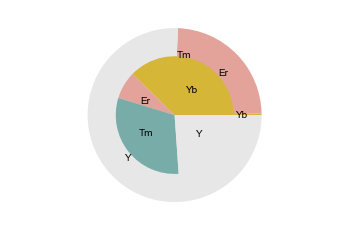

In [ ]:
import matplotlib.colors as colors
fig, ax = plt.subplots()
ax.axis('equal')
labels=["Yb", "Er", "Tm", "Y"]
# cm = plt.get_cmap("tab20")
# cmap = cm([2,5,0,15])
cm = colors.ListedColormap(['#D5B637', '#E3A39A','#78ACA8', '#E7E7E7', '#20425B'])
cmap = cm([0,1,2,3,4])
temp = df1.iloc[23]
yttrium1 = 1- temp.yb_1 - temp.er_1 - temp.tm_1
yttrium2 = 1- temp.yb_2 - temp.er_2 - temp.tm_2
pie_shell, _ = ax.pie([temp.yb_2,temp.er_2,temp.tm_2, round(yttrium2,3)], radius=1, labels=labels, labeldistance = 0.7,colors = cmap)
pie_core, _ = ax.pie([temp.yb_1,temp.er_1,temp.tm_1, round(yttrium1,3)], radius =temp.radius/34, labels=labels, labeldistance=0.7*temp.radius/34,colors = cmap)
# plt.setp(pie_core,edgecolor='white')
# plt.setp(pie_shell,edgecolor='white')
plt.text(-0.3,1,'iteration='+str(i-19))
plt.show()

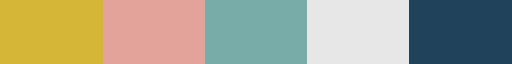

In [21]:
cm

In [7]:
import matplotlib.colors as colors
def showNP_nolabel(temp):   
    fig, ax = plt.subplots()
    ax.axis('equal')
    labels=["Yb", "Er", "Tm", "Y"]
    cm = colors.ListedColormap(['#D5BB67', '#E3A39A','#78ACA8', '#E7E7E7','#20425B'])
    cmap = cm([0,1,2,3,4])

    yttrium1 = 1- temp.yb_1 - temp.er_1 - temp.tm_1
    yttrium2 = 1- temp.yb_2 - temp.er_2 - temp.tm_2
    #pie_surface, _ = ax.pie([0, 0, 0, 0,1], radius=40/34, colors = cmap)
    pie_shell, _ = ax.pie([temp.yb_2,temp.er_2,temp.tm_2, round(yttrium2,3),0], radius=1, colors = cmap)
    pie_core, _ = ax.pie([temp.yb_1,temp.er_1,temp.tm_1, round(yttrium1,3),0], radius =temp.radius/34, colors = cmap)
    plt.setp(pie_core,edgecolor='white')
    plt.setp(pie_shell,edgecolor='white')
    plt.show()
    return fig
def showNP(temp, i):   
    fig, ax = plt.subplots()
    ax.axis('equal')
    labels=["Yb", "Er", "Tm", "Y"]
    cm = colors.ListedColormap(['#D5BB67', '#E3A39A','#78ACA8', '#E7E7E7','#20425B'])
    cmap = cm([0,1,2,3,4])

    yttrium1 = 1- temp.yb_1 - temp.er_1 - temp.tm_1
    yttrium2 = 1- temp.yb_2 - temp.er_2 - temp.tm_2
    pie_surface, _ = ax.pie([0, 0, 0, 0,1], radius=40/34, colors = cmap)
    pie_shell, _ = ax.pie([temp.yb_2,temp.er_2,temp.tm_2, round(yttrium2,3),0], radius=1, colors = cmap)
    pie_core, _ = ax.pie([temp.yb_1,temp.er_1,temp.tm_1, round(yttrium1,3),0], radius =temp.radius/34, colors = cmap)
    plt.setp(pie_core,edgecolor='white')
    plt.setp(pie_shell,edgecolor='white')
    plt.text(-0.3,1.2,'iteration='+str(i))


    plt.show()
    return fig
def showNP_2pies(temp1, temp2, i):   
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.axis('equal')
    labels=["Yb", "Er", "Tm", "Y"]
    cm = colors.ListedColormap(['#D5BB67', '#E3A39A','#78ACA8', '#E7E7E7','#20425B'])
    cmap = cm([0,1,2,3,4])
    
    #ax1: new NP
    yttrium11 = 1- temp1.yb_1 - temp1.er_1 - temp1.tm_1
    yttrium12 = 1- temp1.yb_2 - temp1.er_2 - temp1.tm_2
    pie_surface, _ = ax1.pie([0, 0, 0, 0,1], radius=40/34, colors = cmap)
    pie_shell, _ = ax1.pie([temp1.yb_2,temp1.er_2,temp1.tm_2, round(yttrium12,3),0], radius=1, colors = cmap)
    pie_core, _ = ax1.pie([temp1.yb_1,temp1.er_1,temp1.tm_1, round(yttrium11,3),0], radius =temp1.radius/34, colors = cmap)
    #ax2: best NP
    yttrium21 = 1- temp2.yb_1 - temp2.er_1 - temp2.tm_1
    yttrium22 = 1- temp2.yb_2 - temp2.er_2 - temp2.tm_2
    pie_surface, _ = ax2.pie([0, 0, 0, 0,1], radius=40/34, colors = cmap)
    pie_shell, _ = ax2.pie([temp2.yb_2,temp2.er_2,temp2.tm_2, round(yttrium22,3),0], radius=1, colors = cmap)
    pie_core, _ = ax2.pie([temp2.yb_1,temp2.er_1,temp2.tm_1, round(yttrium21,3),0], radius =temp2.radius/34, colors = cmap)
    
#     plt.setp(pie_core,edgecolor='white')
#     plt.setp(pie_shell,edgecolor='white')
    plt.text(-2,2,'iteration='+str(i))
    plt.text(-3.3,1.5,'new NP')
    plt.text(-0.3,1.5,'best NP')

    plt.show()
    return fig

# trajectory

In [41]:
plt.rcParams["font.family"] = "arial"

def feature_traj(df,feature_idx):
    evalued = len(df)
    y_ = []
    x_ = []
    for i in range(evalued):
        y_.append(df.iloc[i,feature_idx])
        x_.append(i)
    return x_, y_

46
6487.498998


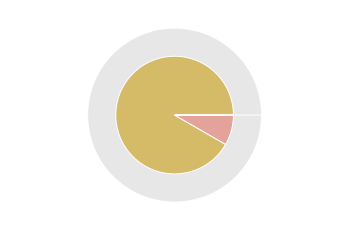

In [12]:
df = df1
idxs = df.UV.nlargest(1).index
for i in idxs:
    print(i)
    print(df.iloc[i].UV)
    fig=showNP_nolabel(df.iloc[i])
    fname = 'YbErTM_df1_best'+str(i)+'.pdf'
    fig.savefig(fname)

57
4724.999093


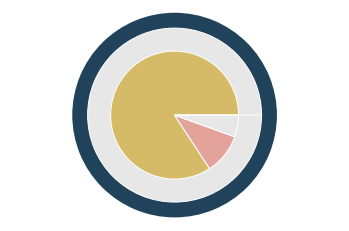

In [116]:
df = df2
idxs = df.UV.nlargest(1).index
for i in idxs:
    print(i)
    print(df.iloc[i].UV)
    fig=showNP_nolabel(df.iloc[i])
    fname = 'YbErTM_df3_best'+str(i)+'.pdf'
    fig.savefig(fname)

25
yb_1              0.930000
er_1              0.000000
tm_1              0.070000
yb_2              0.000000
er_2              0.000000
tm_2              0.000000
radius           23.000000
UV            11168.748558
VIS            9312.498833
BLUE           2137.499736
GREEN          3981.249496
RED            3074.999615
TOTAL         28412.496373
ABSORPTION    45574.994075
qe                0.019085
Name: 25, dtype: float64


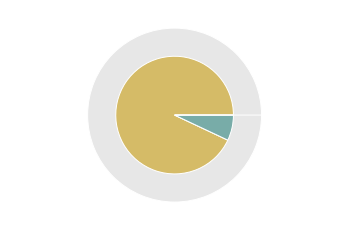

In [9]:
df = df3
idxs = df.UV.nlargest(1).index
for i in idxs:
    print(i)
    print(df.iloc[i])
    fig=showNP_nolabel(df.iloc[i])
    fname = 'YbErTM_df3_best'+str(i)+'.pdf'
    fig.savefig(fname)

32
yb_1              0.683000
er_1              0.000000
tm_1              0.054000
yb_2              0.000000
er_2              0.000000
tm_2              0.000000
radius           15.000000
UV             7249.991413
VIS            5312.493701
BLUE           1431.248356
GREEN          2799.996681
RED             981.248841
TOTAL         16843.729991
ABSORPTION    14112.482724
qe                0.060756
Name: 32, dtype: float64


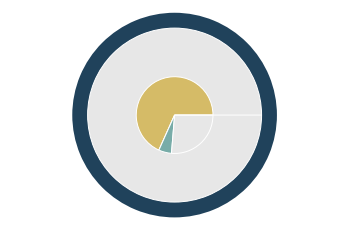

In [119]:
df = df4
idxs = df.UV.nlargest(1).index
for i in idxs:
    print(i)
    print(df.iloc[i])
    fig=showNP_nolabel(df.iloc[i])